In [27]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [29]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [30]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [31]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [32]:
tf.keras.backend.clear_session()

In [33]:
subject = 'Pernambuco - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [34]:
data = pd.read_csv('2003_mo_model_input_PE.csv')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - Consumo de Cimento (t),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego
0,2003-1,0.724032,-5331.049150,11.520143,1.639718,1.036534,1.772069e+08,7.330309e+06,0.969649,0.297418,34.266080,99.743,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029
1,2003-2,0.690297,-5318.079644,11.189862,1.378899,0.993449,1.773884e+08,7.335910e+06,0.950783,0.298912,34.126272,86.997,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006
2,2003-3,0.669681,-5436.417870,10.820792,1.924317,0.973020,1.775699e+08,7.341511e+06,0.938332,0.300346,34.414272,83.033,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983
3,2003-4,0.660494,-5707.015274,10.417840,1.331174,0.940489,1.777514e+08,7.347112e+06,0.926401,0.301729,34.576094,82.302,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960
4,2003-5,0.648337,-5599.317941,9.959690,1.736072,0.917493,1.779329e+08,7.352713e+06,0.951683,0.302368,34.890197,80.217,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478890,26.779678,164.137,NaN,NaN,NaN,NaN,NaN,NaN
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478683,26.996501,168.356,NaN,NaN,NaN,NaN,NaN,NaN
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476012,26.919241,172.421,NaN,NaN,NaN,NaN,NaN,NaN
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473486,27.026250,165.411,NaN,NaN,NaN,NaN,NaN,NaN


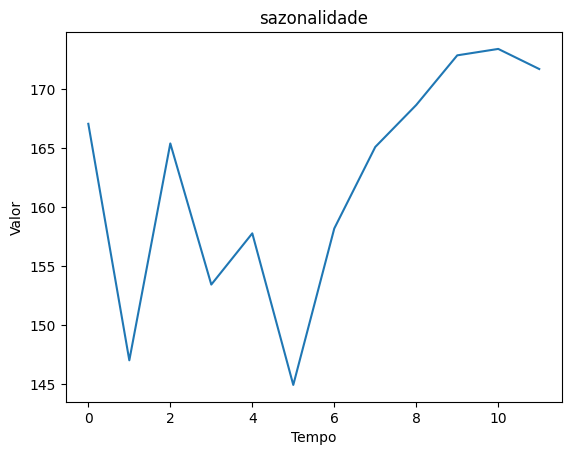

,sazonalidade
sazonalidade,
0,167.055357
1,147.015000
2,165.391500
3,153.433786
4,157.774429
5,144.931071
6,158.185857
7,165.094071
8,168.651714


In [35]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [36]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.724032,-5331.049150,11.520143,1.639718,1.036534,1.772069e+08,7.330309e+06,0.969649,0.297418,34.266080,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,167.055357,99.743
1,2003-2,0.690297,-5318.079644,11.189862,1.378899,0.993449,1.773884e+08,7.335910e+06,0.950783,0.298912,34.126272,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,147.015000,86.997
2,2003-3,0.669681,-5436.417870,10.820792,1.924317,0.973020,1.775699e+08,7.341511e+06,0.938332,0.300346,34.414272,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,165.391500,83.033
3,2003-4,0.660494,-5707.015274,10.417840,1.331174,0.940489,1.777514e+08,7.347112e+06,0.926401,0.301729,34.576094,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,153.433786,82.302
4,2003-5,0.648337,-5599.317941,9.959690,1.736072,0.917493,1.779329e+08,7.352713e+06,0.951683,0.302368,34.890197,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,157.774429,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478890,26.779678,NaN,NaN,NaN,NaN,NaN,NaN,165.094071,164.137
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478683,26.996501,NaN,NaN,NaN,NaN,NaN,NaN,168.651714,168.356
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476012,26.919241,NaN,NaN,NaN,NaN,NaN,NaN,172.856643,172.421
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473486,27.026250,NaN,NaN,NaN,NaN,NaN,NaN,173.400643,165.411


In [37]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
235        NaN
236        NaN
237        NaN
238        NaN
239        NaN
Name: Pernambuco - Consumo de Cimento (t), Length: 240, dtype: float64

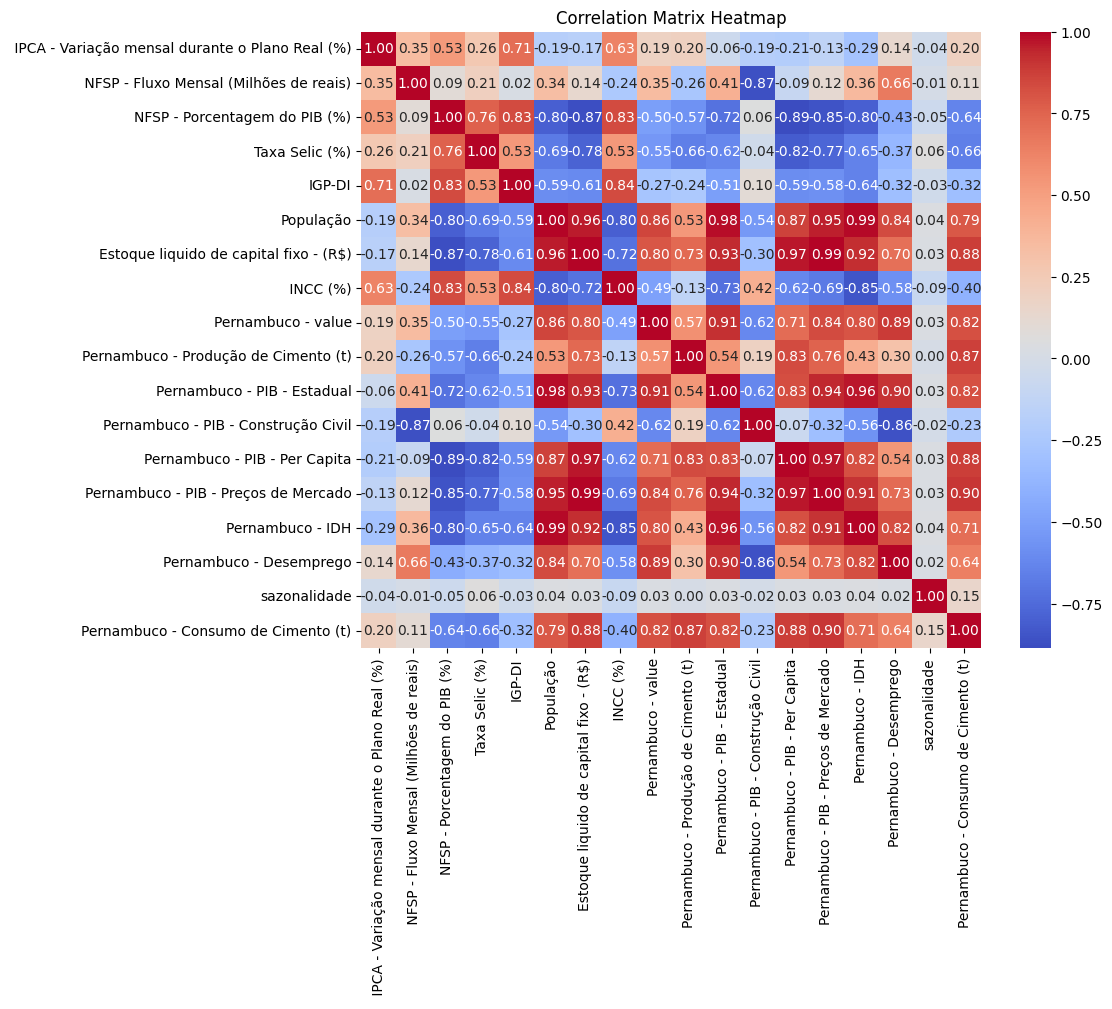

In [38]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

safe_data = data.iloc[:split_index + 1,1:-1]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def remove_high_vif_columns(dataframe, threshold=1000):
    i=0
    while True:
        vif_result = calculate_vif(dataframe)
        high_vif_column = vif_result.loc[vif_result["VIF"].idxmax()]["Feature"]
        
        if vif_result["VIF"].max() <= threshold:
            print(f"Num columns removed: {i}")
            return dataframe
        i += 1
        dataframe = dataframe.drop(high_vif_column, axis=1)

In [40]:
safe_data = data.iloc[:split_index + 1,1:-1]
vif_info = calculate_vif(safe_data)
vif_info

,Feature,VIF
0,IPCA - Variação mensal durante o Plano Real (%),1.707294e+03
1,NFSP - Fluxo Mensal (Milhões de reais),3.539481e+02
2,NFSP - Porcentagem do PIB (%),3.006028e+02
3,Taxa Selic (%),5.933575e+01
4,IGP-DI,3.669357e+02
5,População,1.012790e+07
6,Estoque liquido de capital fixo - (R$),1.462044e+07
7,INCC (%),1.298105e+03
8,Pernambuco - value,1.407486e+04
9,Pernambuco - Produção de Cimento (t),7.038504e+03


In [41]:
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.724032,-5331.049150,11.520143,1.639718,1.036534,1.772069e+08,7.330309e+06,0.969649,0.297418,34.266080,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,167.055357,99.743
1,2003-2,0.690297,-5318.079644,11.189862,1.378899,0.993449,1.773884e+08,7.335910e+06,0.950783,0.298912,34.126272,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,147.015000,86.997
2,2003-3,0.669681,-5436.417870,10.820792,1.924317,0.973020,1.775699e+08,7.341511e+06,0.938332,0.300346,34.414272,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,165.391500,83.033
3,2003-4,0.660494,-5707.015274,10.417840,1.331174,0.940489,1.777514e+08,7.347112e+06,0.926401,0.301729,34.576094,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,153.433786,82.302
4,2003-5,0.648337,-5599.317941,9.959690,1.736072,0.917493,1.779329e+08,7.352713e+06,0.951683,0.302368,34.890197,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,157.774429,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478890,26.779678,NaN,NaN,NaN,NaN,NaN,NaN,165.094071,164.137
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478683,26.996501,NaN,NaN,NaN,NaN,NaN,NaN,168.651714,168.356
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476012,26.919241,NaN,NaN,NaN,NaN,NaN,NaN,172.856643,172.421
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473486,27.026250,NaN,NaN,NaN,NaN,NaN,NaN,173.400643,165.411


In [42]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,sazonalidade
0,2.802383,0.604311,4.268118,2.039314,3.921218,-2.016914,-2.299937,3.214079,-0.965999,-1.307830,-1.693326,-0.288657,-2.434470,-2.233933,-2.075790,-0.799211,0.526117
1,2.402642,0.609431,4.096014,1.195209,3.582946,-1.988421,-2.263992,3.051841,-0.915774,-1.314466,-1.673783,-0.254430,-2.386964,-2.194305,-2.041621,-0.801299,-1.611949
2,2.158351,0.562720,3.903698,2.960381,3.422548,-1.959928,-2.228047,2.944772,-0.867579,-1.300796,-1.654240,-0.220203,-2.339459,-2.154678,-2.007452,-0.803387,0.348603
3,2.049492,0.455907,3.693727,1.040752,3.167136,-1.931435,-2.192102,2.842174,-0.821065,-1.293115,-1.634698,-0.185977,-2.291954,-2.115051,-1.973284,-0.805475,-0.927142
4,1.905441,0.498418,3.454992,2.351150,2.986591,-1.902941,-2.156157,3.059587,-0.799614,-1.278206,-1.615155,-0.151750,-2.244448,-2.075423,-1.939115,-0.807563,-0.464047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-1.429358,0.425789,-0.584804,-1.503380,-0.514871,1.368581,0.605679,-1.872446,1.457421,-1.261759,1.212742,-1.694181,0.199185,0.598628,1.522713,1.328965,0.316871
176,-1.523783,0.339575,-0.580461,-0.733634,-0.473208,1.380202,0.591420,-1.876611,1.495700,-1.299522,1.205538,-1.690610,0.176528,0.579088,1.523361,1.321687,0.696429
177,-1.578548,0.160702,-0.571531,-0.323353,-0.484199,1.391823,0.577161,-1.875135,1.535488,-1.328191,1.198335,-1.687039,0.153872,0.559548,1.524008,1.314408,1.145045
178,-1.597335,0.244264,-0.555524,0.132757,-0.359568,1.403443,0.562902,-1.942040,1.573594,-1.352208,1.191131,-1.683469,0.131215,0.540008,1.524655,1.307130,1.203083


In [43]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,sazonalidade
0,2.802383,0.604311,4.268118,2.039314,3.921218,-2.016914,-2.299937,3.214079,-0.965999,-1.307830,-1.693326,-0.288657,-2.434470,-2.233933,-2.075790,-0.799211,0.526117
1,2.402642,0.609431,4.096014,1.195209,3.582946,-1.988421,-2.263992,3.051841,-0.915774,-1.314466,-1.673783,-0.254430,-2.386964,-2.194305,-2.041621,-0.801299,-1.611949
2,2.158351,0.562720,3.903698,2.960381,3.422548,-1.959928,-2.228047,2.944772,-0.867579,-1.300796,-1.654240,-0.220203,-2.339459,-2.154678,-2.007452,-0.803387,0.348603
3,2.049492,0.455907,3.693727,1.040752,3.167136,-1.931435,-2.192102,2.842174,-0.821065,-1.293115,-1.634698,-0.185977,-2.291954,-2.115051,-1.973284,-0.805475,-0.927142
4,1.905441,0.498418,3.454992,2.351150,2.986591,-1.902941,-2.156157,3.059587,-0.799614,-1.278206,-1.615155,-0.151750,-2.244448,-2.075423,-1.939115,-0.807563,-0.464047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-0.960452,1.465326,-0.676734,0.472779,-1.087000,1.228701,0.759879,-1.491033,0.717812,-0.682771,1.255355,-1.688569,0.390248,0.760375,1.522528,1.416529,0.316871
164,-1.007966,1.351131,-0.668750,0.302784,-0.904679,1.240408,0.749001,-1.525186,0.781222,-0.742355,1.256917,-1.694691,0.383755,0.755382,1.521659,1.409206,0.696429
165,-0.976556,1.143146,-0.657609,0.339539,-0.900134,1.252114,0.738124,-1.546744,0.845390,-0.806950,1.258479,-1.700812,0.377262,0.750388,1.520790,1.401884,1.145045
166,-1.146834,1.542609,-0.647588,0.472795,-1.136836,1.263821,0.727246,-1.586381,0.907066,-0.870102,1.260042,-1.706934,0.370769,0.745395,1.519920,1.394561,1.203083


In [44]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
163    158.533
164    133.813
165    155.827
166    146.197
167    122.278
Name: Pernambuco - Consumo de Cimento (t), Length: 168, dtype: float64

In [45]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [46]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [47]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,sazonalidade
132,1.530065,0.817451,-0.366715,-0.530011,0.174628,0.848407,0.965586,-0.066954,1.492892,1.251859,1.034131,-0.767282,0.861918,1.012795,0.637325,1.129373,0.526117
133,1.649361,1.130195,-0.350285,-0.532694,0.240832,0.861179,0.962419,-0.130652,1.472535,1.200487,1.043778,-0.812392,0.835168,0.998607,0.636921,1.149179,-1.611949
134,1.622916,1.160498,-0.335122,-0.186421,0.176857,0.873950,0.959252,-0.079602,1.430539,1.153442,1.053425,-0.857503,0.808418,0.984419,0.636516,1.168984,0.348603
135,1.581460,1.131990,-0.321950,-0.719664,-0.005233,0.886722,0.956085,-0.034473,1.390497,1.105050,1.063072,-0.902614,0.781668,0.970232,0.636112,1.188790,-0.927142
136,1.638292,1.384387,-0.302995,-0.798520,0.097576,0.899493,0.952918,-0.177535,1.335590,1.055872,1.072719,-0.947724,0.754919,0.956044,0.635708,1.208595,-0.464047
137,1.643773,1.375487,-0.290554,-0.612129,0.431487,0.912265,0.949751,-0.208868,1.293808,1.005928,1.082366,-0.992835,0.728169,0.941857,0.635304,1.228401,-1.834279
138,1.704584,1.438928,-0.281926,-0.476740,0.482414,0.925036,0.946584,-0.245300,1.248532,0.955067,1.092013,-1.037945,0.701419,0.927669,0.634899,1.248206,-0.420152
139,1.841703,1.569590,-0.275931,-0.211736,0.657043,0.937808,0.943417,-0.333490,1.207926,0.902769,1.101660,-1.083056,0.674669,0.913481,0.634495,1.268012,0.316871
140,1.837218,1.584058,-0.271466,-0.484608,0.678386,0.950580,0.940250,-0.296846,1.167008,0.849170,1.111307,-1.128167,0.647920,0.899294,0.634091,1.287817,0.696429
141,1.797860,1.166380,-0.273241,-0.183907,0.727143,0.963351,0.937082,-0.292462,1.117950,0.794381,1.120954,-1.173277,0.621170,0.885106,0.633686,1.307623,1.145045


In [48]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [49]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [50]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [51]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [52]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1022488231, 3114672499, 444467557, 3765918775, 1705525313, 4241256815, 608596258, 2789718597, 2834446522, 3974344852]


Step: 0 ___________________________________________
val_loss: 176.67868041992188
winner_seed: 1022488231


Step: 1 ___________________________________________
val_loss: 320.3171081542969


Step: 2 ___________________________________________
val_loss: 199.61900329589844


Step: 3 ___________________________________________
val_loss: 156.38038635253906
winner_seed: 3765918775


Step: 4 ___________________________________________
val_loss: 236.45286560058594


Step: 5 ___________________________________________
val_loss: 199.6643829345703


Step: 6 ___________________________________________
val_loss: 244.2250213623047


Step: 7 ___________________________________________
val_loss: 176.88082885742188


Step: 8 ___________________________________________
val_loss: 173.3453369140625


Step: 9 ___________________________________________
val_loss: 217.1054229736328


final_

In [53]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 1012299702

Epoch 1/10000
4/4 [==============================] - 2s 113ms/step - loss: 34722.5352 - val_loss: 21672.5957
Epoch 2/10000
4/4 [==============================] - 0s 7ms/step - loss: 13932.2207 - val_loss: 258.7315
Epoch 3/10000
4/4 [==============================] - 0s 7ms/step - loss: 2145.3079 - val_loss: 518.1748
Epoch 4/10000
4/4 [==============================] - 0s 7ms/step - loss: 1642.4452 - val_loss: 902.4384
Epoch 5/10000
4/4 [==============================] - 0s 7ms/step - loss: 1386.6444 - val_loss: 928.7243
Epoch 6/10000
4/4 [==============================] - 0s 7ms/step - loss: 1100.3712 - val_loss: 444.8943
Epoch 7/10000
4/4 [==============================] - 0s 7ms/step - loss: 919.6384 - val_loss: 641.7402
Epoch 8/10000
4/4 [==============================] - 0s 8ms/step - loss: 714.4011 - val_loss: 862.4313
Epoch 9/10000
4/4 [==============================] - 0s 7ms/step - loss: 677.7120 - val_loss: 1139.8711
Epoch 10/10000
4/4 [==============================] - 0s 7ms

4/4 [==============================] - 0s 7ms/step - loss: 261.8442 - val_loss: 521.1302
Epoch 80/10000
4/4 [==============================] - 0s 7ms/step - loss: 275.3511 - val_loss: 475.9559
Epoch 81/10000
4/4 [==============================] - 0s 7ms/step - loss: 240.8605 - val_loss: 507.1317
Epoch 82/10000
4/4 [==============================] - 0s 7ms/step - loss: 253.8075 - val_loss: 497.1370
Epoch 83/10000
4/4 [==============================] - 0s 7ms/step - loss: 258.2482 - val_loss: 488.5645
Epoch 84/10000
4/4 [==============================] - 0s 7ms/step - loss: 262.5084 - val_loss: 414.5619
Epoch 85/10000
4/4 [==============================] - 0s 7ms/step - loss: 222.9993 - val_loss: 581.4599
Epoch 86/10000
4/4 [==============================] - 0s 7ms/step - loss: 239.9419 - val_loss: 483.9842
Epoch 87/10000
4/4 [==============================] - 0s 7ms/step - loss: 247.0511 - val_loss: 545.8821
Epoch 88/10000
4/4 [==============================] - 0s 7ms/step - loss: 233.5

4/4 [==============================] - 0s 7ms/step - loss: 204.3780 - val_loss: 317.5597
Epoch 158/10000
4/4 [==============================] - 0s 7ms/step - loss: 190.3261 - val_loss: 302.1916
Epoch 159/10000
4/4 [==============================] - 0s 7ms/step - loss: 174.7393 - val_loss: 338.5910
Epoch 160/10000
4/4 [==============================] - 0s 7ms/step - loss: 207.3668 - val_loss: 288.3896
Epoch 161/10000
4/4 [==============================] - 0s 7ms/step - loss: 197.1412 - val_loss: 294.4493
Epoch 162/10000
4/4 [==============================] - 0s 7ms/step - loss: 191.0738 - val_loss: 296.3661
Epoch 163/10000
4/4 [==============================] - 0s 7ms/step - loss: 196.4563 - val_loss: 266.5030
Epoch 164/10000
4/4 [==============================] - 0s 7ms/step - loss: 197.6342 - val_loss: 320.3765
Epoch 165/10000
4/4 [==============================] - 0s 7ms/step - loss: 190.0226 - val_loss: 434.6623
Epoch 166/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 172.3467 - val_loss: 241.9690
Epoch 236/10000
4/4 [==============================] - 0s 7ms/step - loss: 178.5592 - val_loss: 261.4827
Epoch 237/10000
4/4 [==============================] - 0s 7ms/step - loss: 201.9039 - val_loss: 259.1108
Epoch 238/10000
4/4 [==============================] - 0s 7ms/step - loss: 175.0922 - val_loss: 252.3512
Epoch 239/10000
4/4 [==============================] - 0s 7ms/step - loss: 171.9258 - val_loss: 267.5593
Epoch 240/10000
4/4 [==============================] - 0s 7ms/step - loss: 183.8907 - val_loss: 242.5808
Epoch 241/10000
4/4 [==============================] - 0s 7ms/step - loss: 166.8204 - val_loss: 245.8317
Epoch 242/10000
4/4 [==============================] - 0s 7ms/step - loss: 181.9146 - val_loss: 239.5865
Epoch 243/10000
4/4 [==============================] - 0s 7ms/step - loss: 185.0155 - val_loss: 322.6182
Epoch 244/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 168.2529 - val_loss: 238.3009
Epoch 314/10000
4/4 [==============================] - 0s 7ms/step - loss: 152.7188 - val_loss: 240.7019
Epoch 315/10000
4/4 [==============================] - 0s 7ms/step - loss: 148.1825 - val_loss: 239.0485
Epoch 316/10000
4/4 [==============================] - 0s 7ms/step - loss: 157.5701 - val_loss: 244.7699
Epoch 317/10000
4/4 [==============================] - 0s 7ms/step - loss: 156.0219 - val_loss: 242.2492
Epoch 318/10000
4/4 [==============================] - 0s 7ms/step - loss: 153.6011 - val_loss: 251.1566
Epoch 319/10000
4/4 [==============================] - 0s 7ms/step - loss: 151.0184 - val_loss: 238.2453
Epoch 320/10000
4/4 [==============================] - 0s 7ms/step - loss: 158.5803 - val_loss: 261.0885
Epoch 321/10000
4/4 [==============================] - 0s 7ms/step - loss: 163.3374 - val_loss: 239.5097
Epoch 322/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 161.2047 - val_loss: 232.2617
Epoch 392/10000
4/4 [==============================] - 0s 8ms/step - loss: 143.8499 - val_loss: 231.6998
Epoch 393/10000
4/4 [==============================] - 0s 7ms/step - loss: 152.0949 - val_loss: 237.2870
Epoch 394/10000
4/4 [==============================] - 0s 7ms/step - loss: 153.4054 - val_loss: 228.1381
Epoch 395/10000
4/4 [==============================] - 0s 7ms/step - loss: 170.7707 - val_loss: 230.6772
Epoch 396/10000
4/4 [==============================] - 0s 7ms/step - loss: 157.1373 - val_loss: 236.4164
Epoch 397/10000
4/4 [==============================] - 0s 7ms/step - loss: 139.6383 - val_loss: 231.2406
Epoch 398/10000
4/4 [==============================] - 0s 8ms/step - loss: 148.6124 - val_loss: 236.2933
Epoch 399/10000
4/4 [==============================] - 0s 7ms/step - loss: 146.1240 - val_loss: 232.1135
Epoch 400/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 170.1295 - val_loss: 232.5807
Epoch 470/10000
4/4 [==============================] - 0s 7ms/step - loss: 154.4045 - val_loss: 235.6378
Epoch 471/10000
4/4 [==============================] - 0s 7ms/step - loss: 171.5082 - val_loss: 227.9650
Epoch 472/10000
4/4 [==============================] - 0s 7ms/step - loss: 179.8017 - val_loss: 230.8541
Epoch 473/10000
4/4 [==============================] - 0s 7ms/step - loss: 164.3641 - val_loss: 230.2007
Epoch 474/10000
4/4 [==============================] - 0s 7ms/step - loss: 168.5820 - val_loss: 229.4402
Epoch 475/10000
4/4 [==============================] - 0s 7ms/step - loss: 170.1955 - val_loss: 227.3993
Epoch 476/10000
4/4 [==============================] - 0s 7ms/step - loss: 145.6818 - val_loss: 226.8021
Epoch 477/10000
4/4 [==============================] - 0s 7ms/step - loss: 139.6449 - val_loss: 236.1642
Epoch 478/10000
4/4 [==============================] - 0s 8ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 130.0985 - val_loss: 223.0103
Epoch 548/10000
4/4 [==============================] - 0s 7ms/step - loss: 129.1464 - val_loss: 225.7802
Epoch 549/10000
4/4 [==============================] - 0s 7ms/step - loss: 121.7390 - val_loss: 224.3813
Epoch 550/10000
4/4 [==============================] - 0s 7ms/step - loss: 124.5496 - val_loss: 223.5262
Epoch 551/10000
4/4 [==============================] - 0s 7ms/step - loss: 213.9323 - val_loss: 224.6710
Epoch 552/10000
4/4 [==============================] - 0s 7ms/step - loss: 271.5670 - val_loss: 228.7481
Epoch 553/10000
4/4 [==============================] - 0s 7ms/step - loss: 316.5031 - val_loss: 256.8023
Epoch 554/10000
4/4 [==============================] - 0s 7ms/step - loss: 229.1992 - val_loss: 227.2296
Epoch 555/10000
4/4 [==============================] - 0s 7ms/step - loss: 207.5483 - val_loss: 231.7603
Epoch 556/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 150.8994 - val_loss: 225.9554
Epoch 626/10000
4/4 [==============================] - 0s 7ms/step - loss: 143.0642 - val_loss: 226.4134
Epoch 627/10000
4/4 [==============================] - 0s 7ms/step - loss: 144.4729 - val_loss: 224.1006
Epoch 628/10000
4/4 [==============================] - 0s 7ms/step - loss: 233.0564 - val_loss: 226.2940
Epoch 629/10000
4/4 [==============================] - 0s 7ms/step - loss: 189.4345 - val_loss: 224.1330
Epoch 630/10000
4/4 [==============================] - 0s 7ms/step - loss: 147.4228 - val_loss: 226.3011
Epoch 631/10000
4/4 [==============================] - 0s 7ms/step - loss: 164.3021 - val_loss: 226.4100
Epoch 632/10000
4/4 [==============================] - 0s 7ms/step - loss: 145.1152 - val_loss: 224.4007
Epoch 633/10000
4/4 [==============================] - 0s 7ms/step - loss: 146.6532 - val_loss: 224.6721
Epoch 634/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 133.7303 - val_loss: 224.6570
Epoch 704/10000
4/4 [==============================] - 0s 7ms/step - loss: 122.3542 - val_loss: 242.4547
Epoch 705/10000
4/4 [==============================] - 0s 7ms/step - loss: 115.2817 - val_loss: 221.7230
Epoch 706/10000
4/4 [==============================] - 0s 7ms/step - loss: 122.3695 - val_loss: 222.7246
Epoch 707/10000
4/4 [==============================] - 0s 7ms/step - loss: 130.0708 - val_loss: 230.4701
Epoch 708/10000
4/4 [==============================] - 0s 7ms/step - loss: 149.9166 - val_loss: 225.9436
Epoch 709/10000
4/4 [==============================] - 0s 7ms/step - loss: 132.1124 - val_loss: 227.0480
Epoch 710/10000
4/4 [==============================] - 0s 7ms/step - loss: 121.5947 - val_loss: 222.0728
Epoch 711/10000
4/4 [==============================] - 0s 7ms/step - loss: 124.9082 - val_loss: 226.3702
Epoch 712/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 131.1152 - val_loss: 228.8913
Epoch 782/10000
4/4 [==============================] - 0s 7ms/step - loss: 128.7914 - val_loss: 229.0050
Epoch 783/10000
4/4 [==============================] - 0s 7ms/step - loss: 129.0328 - val_loss: 228.4147
Epoch 784/10000
4/4 [==============================] - 0s 7ms/step - loss: 129.1468 - val_loss: 227.9200
Epoch 785/10000
4/4 [==============================] - 0s 7ms/step - loss: 129.4861 - val_loss: 227.4130
Epoch 786/10000
4/4 [==============================] - 0s 8ms/step - loss: 126.9908 - val_loss: 226.0360
Epoch 787/10000
4/4 [==============================] - 0s 7ms/step - loss: 128.1261 - val_loss: 225.5554
Epoch 788/10000
4/4 [==============================] - 0s 7ms/step - loss: 127.8298 - val_loss: 227.0334
Epoch 789/10000
4/4 [==============================] - 0s 7ms/step - loss: 125.3244 - val_loss: 224.2534
Epoch 790/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 111.4840 - val_loss: 221.1912
Epoch 860/10000
4/4 [==============================] - 0s 7ms/step - loss: 114.3117 - val_loss: 218.0514
Epoch 861/10000
4/4 [==============================] - 0s 7ms/step - loss: 106.9952 - val_loss: 220.4346
Epoch 862/10000
4/4 [==============================] - 0s 7ms/step - loss: 114.5622 - val_loss: 218.4699
Epoch 863/10000
4/4 [==============================] - 0s 7ms/step - loss: 111.9028 - val_loss: 218.9388
Epoch 864/10000
4/4 [==============================] - 0s 7ms/step - loss: 129.5181 - val_loss: 219.2413
Epoch 865/10000
4/4 [==============================] - 0s 7ms/step - loss: 107.4532 - val_loss: 220.0887
Epoch 866/10000
4/4 [==============================] - 0s 7ms/step - loss: 112.2918 - val_loss: 218.6870
Epoch 867/10000
4/4 [==============================] - 0s 7ms/step - loss: 118.7700 - val_loss: 217.8789
Epoch 868/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 114.9396 - val_loss: 217.5877
Epoch 938/10000
4/4 [==============================] - 0s 8ms/step - loss: 122.4936 - val_loss: 217.0354
Epoch 939/10000
4/4 [==============================] - 0s 7ms/step - loss: 104.3373 - val_loss: 216.6847
Epoch 940/10000
4/4 [==============================] - 0s 8ms/step - loss: 111.9738 - val_loss: 216.1888
Epoch 941/10000
4/4 [==============================] - 0s 8ms/step - loss: 112.7200 - val_loss: 215.1110
Epoch 942/10000
4/4 [==============================] - 0s 7ms/step - loss: 131.1368 - val_loss: 215.3006
Epoch 943/10000
4/4 [==============================] - 0s 8ms/step - loss: 115.3319 - val_loss: 215.8125
Epoch 944/10000
4/4 [==============================] - 0s 7ms/step - loss: 111.3566 - val_loss: 217.3939
Epoch 945/10000
4/4 [==============================] - 0s 8ms/step - loss: 116.6636 - val_loss: 217.2494
Epoch 946/10000
4/4 [==============================] - 0s 8ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 104.7559 - val_loss: 207.4127
Epoch 1016/10000
4/4 [==============================] - 0s 7ms/step - loss: 103.2846 - val_loss: 210.7156
Epoch 1017/10000
4/4 [==============================] - 0s 7ms/step - loss: 103.7728 - val_loss: 211.3408
Epoch 1018/10000
4/4 [==============================] - 0s 7ms/step - loss: 94.9543 - val_loss: 212.5098
Epoch 1019/10000
4/4 [==============================] - 0s 7ms/step - loss: 95.1380 - val_loss: 213.2475
Epoch 1020/10000
4/4 [==============================] - 0s 7ms/step - loss: 91.1765 - val_loss: 214.2599
Epoch 1021/10000
4/4 [==============================] - 0s 7ms/step - loss: 97.7328 - val_loss: 218.7244
Epoch 1022/10000
4/4 [==============================] - 0s 7ms/step - loss: 101.4097 - val_loss: 214.8826
Epoch 1023/10000
4/4 [==============================] - 0s 7ms/step - loss: 91.8391 - val_loss: 215.1101
Epoch 1024/10000
4/4 [==============================] - 0s 7ms/step 

Epoch 1093/10000
4/4 [==============================] - 0s 8ms/step - loss: 173.5110 - val_loss: 212.2903
Epoch 1094/10000
4/4 [==============================] - 0s 8ms/step - loss: 120.7232 - val_loss: 213.9422
Epoch 1095/10000
4/4 [==============================] - 0s 7ms/step - loss: 147.9579 - val_loss: 212.0151
Epoch 1096/10000
4/4 [==============================] - 0s 7ms/step - loss: 134.1066 - val_loss: 216.0674
Epoch 1097/10000
4/4 [==============================] - 0s 8ms/step - loss: 121.4336 - val_loss: 213.4912
Epoch 1098/10000
4/4 [==============================] - 0s 8ms/step - loss: 132.1921 - val_loss: 214.6523
Epoch 1099/10000
4/4 [==============================] - 0s 7ms/step - loss: 139.9912 - val_loss: 209.6529
Epoch 1100/10000
4/4 [==============================] - 0s 7ms/step - loss: 117.3504 - val_loss: 211.0717
Epoch 1101/10000
4/4 [==============================] - 0s 7ms/step - loss: 134.1181 - val_loss: 209.1082
Epoch 1102/10000
4/4 [========================

4/4 [==============================] - 0s 8ms/step - loss: 137.5096 - val_loss: 206.2351
Epoch 1171/10000
4/4 [==============================] - 0s 8ms/step - loss: 116.1059 - val_loss: 205.1855
Epoch 1172/10000
4/4 [==============================] - 0s 8ms/step - loss: 98.9973 - val_loss: 204.0063
Epoch 1173/10000
4/4 [==============================] - 0s 7ms/step - loss: 96.1186 - val_loss: 206.8439
Epoch 1174/10000
4/4 [==============================] - 0s 8ms/step - loss: 111.1526 - val_loss: 203.6413
Epoch 1175/10000
4/4 [==============================] - 0s 8ms/step - loss: 117.2945 - val_loss: 208.2708
Epoch 1176/10000
4/4 [==============================] - 0s 7ms/step - loss: 105.3185 - val_loss: 206.4299
Epoch 1177/10000
4/4 [==============================] - 0s 8ms/step - loss: 96.5718 - val_loss: 203.7864
Epoch 1178/10000
4/4 [==============================] - 0s 7ms/step - loss: 113.3106 - val_loss: 209.3536
Epoch 1179/10000
4/4 [==============================] - 0s 7ms/ste

Epoch 1248/10000
4/4 [==============================] - 0s 7ms/step - loss: 76.4114 - val_loss: 198.2408
Epoch 1249/10000
4/4 [==============================] - 0s 7ms/step - loss: 88.0551 - val_loss: 196.0947
Epoch 1250/10000
4/4 [==============================] - 0s 7ms/step - loss: 80.4146 - val_loss: 216.6454
Epoch 1251/10000
4/4 [==============================] - 0s 7ms/step - loss: 87.7286 - val_loss: 204.6464
Epoch 1252/10000
4/4 [==============================] - 0s 7ms/step - loss: 76.5563 - val_loss: 205.8306
Epoch 1253/10000
4/4 [==============================] - 0s 7ms/step - loss: 83.2786 - val_loss: 203.4426
Epoch 1254/10000
4/4 [==============================] - 0s 7ms/step - loss: 87.0703 - val_loss: 204.0976
Epoch 1255/10000
4/4 [==============================] - 0s 7ms/step - loss: 82.2794 - val_loss: 205.5552
Epoch 1256/10000
4/4 [==============================] - 0s 7ms/step - loss: 88.8260 - val_loss: 205.0134
Epoch 1257/10000
4/4 [==============================] -

4/4 [==============================] - 0s 7ms/step - loss: 108.2542 - val_loss: 199.1923
Epoch 1327/10000
4/4 [==============================] - 0s 7ms/step - loss: 95.4311 - val_loss: 188.3881
Epoch 1328/10000
4/4 [==============================] - 0s 7ms/step - loss: 90.7111 - val_loss: 190.7928
Epoch 1329/10000
4/4 [==============================] - 0s 7ms/step - loss: 92.5927 - val_loss: 186.4613
Epoch 1330/10000
4/4 [==============================] - 0s 7ms/step - loss: 86.6086 - val_loss: 188.9322
Epoch 1331/10000
4/4 [==============================] - 0s 7ms/step - loss: 87.0805 - val_loss: 195.0405
Epoch 1332/10000
4/4 [==============================] - 0s 7ms/step - loss: 74.5110 - val_loss: 193.6407
Epoch 1333/10000
4/4 [==============================] - 0s 7ms/step - loss: 75.8810 - val_loss: 191.5895
Epoch 1334/10000
4/4 [==============================] - 0s 7ms/step - loss: 81.6163 - val_loss: 195.3683
Epoch 1335/10000
4/4 [==============================] - 0s 7ms/step - l

4/4 [==============================] - 0s 7ms/step - loss: 74.1098 - val_loss: 194.5575
Epoch 1405/10000
4/4 [==============================] - 0s 7ms/step - loss: 118.1106 - val_loss: 196.2743
Epoch 1406/10000
4/4 [==============================] - 0s 7ms/step - loss: 76.2396 - val_loss: 192.1576
Epoch 1407/10000
4/4 [==============================] - 0s 7ms/step - loss: 78.6471 - val_loss: 191.2499
Epoch 1408/10000
4/4 [==============================] - 0s 7ms/step - loss: 67.5985 - val_loss: 194.8748
Epoch 1409/10000
4/4 [==============================] - 0s 7ms/step - loss: 74.9052 - val_loss: 194.2019
Epoch 1410/10000
4/4 [==============================] - 0s 7ms/step - loss: 67.9531 - val_loss: 193.5664
Epoch 1411/10000
4/4 [==============================] - 0s 7ms/step - loss: 78.3626 - val_loss: 196.6274
Epoch 1412/10000
4/4 [==============================] - 0s 7ms/step - loss: 74.7901 - val_loss: 198.3838
Epoch 1413/10000
4/4 [==============================] - 0s 7ms/step - l

4/4 [==============================] - 0s 7ms/step - loss: 80.3721 - val_loss: 188.2870
Epoch 1483/10000
4/4 [==============================] - 0s 7ms/step - loss: 82.5246 - val_loss: 185.8022
Epoch 1484/10000
4/4 [==============================] - 0s 7ms/step - loss: 87.0106 - val_loss: 187.3474
Epoch 1485/10000
4/4 [==============================] - 0s 7ms/step - loss: 71.4572 - val_loss: 193.5174
Epoch 1486/10000
4/4 [==============================] - 0s 7ms/step - loss: 75.6657 - val_loss: 189.7123
Epoch 1487/10000
4/4 [==============================] - 0s 7ms/step - loss: 78.7163 - val_loss: 194.4347
Epoch 1488/10000
4/4 [==============================] - 0s 7ms/step - loss: 76.3599 - val_loss: 192.1332
Epoch 1489/10000
4/4 [==============================] - 0s 7ms/step - loss: 74.7257 - val_loss: 188.3891
Epoch 1490/10000
4/4 [==============================] - 0s 7ms/step - loss: 74.1914 - val_loss: 190.4205
Epoch 1491/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 64.8427 - val_loss: 186.7939
Epoch 1561/10000
4/4 [==============================] - 0s 7ms/step - loss: 70.3443 - val_loss: 187.0896
Epoch 1562/10000
4/4 [==============================] - 0s 7ms/step - loss: 68.2582 - val_loss: 183.5783
Epoch 1563/10000
4/4 [==============================] - 0s 7ms/step - loss: 62.2839 - val_loss: 186.8992
Epoch 1564/10000
4/4 [==============================] - 0s 7ms/step - loss: 66.0451 - val_loss: 192.8274
Epoch 1565/10000
4/4 [==============================] - 0s 7ms/step - loss: 68.7606 - val_loss: 193.2250
Epoch 1566/10000
4/4 [==============================] - 0s 7ms/step - loss: 60.9794 - val_loss: 191.0846
Epoch 1567/10000
4/4 [==============================] - 0s 7ms/step - loss: 58.3272 - val_loss: 188.7334
Epoch 1568/10000
4/4 [==============================] - 0s 7ms/step - loss: 113.8542 - val_loss: 191.7234
Epoch 1569/10000
4/4 [==============================] - 0s 7ms/step - l

4/4 [==============================] - 0s 7ms/step - loss: 56.2763 - val_loss: 195.5541
Epoch 1639/10000
4/4 [==============================] - 0s 7ms/step - loss: 61.4792 - val_loss: 190.2855
Epoch 1640/10000
4/4 [==============================] - 0s 7ms/step - loss: 63.6781 - val_loss: 192.2184
Epoch 1641/10000
4/4 [==============================] - 0s 7ms/step - loss: 68.3038 - val_loss: 192.6452
Epoch 1642/10000
4/4 [==============================] - 0s 7ms/step - loss: 64.8114 - val_loss: 189.7019
Epoch 1643/10000
4/4 [==============================] - 0s 8ms/step - loss: 60.2890 - val_loss: 200.2934
Epoch 1644/10000
4/4 [==============================] - 0s 7ms/step - loss: 56.9230 - val_loss: 189.4971
Epoch 1645/10000
4/4 [==============================] - 0s 7ms/step - loss: 57.2469 - val_loss: 183.3785
Epoch 1646/10000
4/4 [==============================] - 0s 7ms/step - loss: 52.0596 - val_loss: 184.9222
Epoch 1647/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 93.1571 - val_loss: 177.1156
Epoch 1717/10000
4/4 [==============================] - 0s 7ms/step - loss: 63.8839 - val_loss: 174.5920
Epoch 1718/10000
4/4 [==============================] - 0s 7ms/step - loss: 60.4794 - val_loss: 175.6536
Epoch 1719/10000
4/4 [==============================] - 0s 7ms/step - loss: 71.9731 - val_loss: 172.3499
Epoch 1720/10000
4/4 [==============================] - 0s 7ms/step - loss: 63.8145 - val_loss: 172.3109
Epoch 1721/10000
4/4 [==============================] - 0s 7ms/step - loss: 78.3078 - val_loss: 171.0791
Epoch 1722/10000
4/4 [==============================] - 0s 8ms/step - loss: 74.6115 - val_loss: 170.7229
Epoch 1723/10000
4/4 [==============================] - 0s 7ms/step - loss: 58.8313 - val_loss: 170.7936
Epoch 1724/10000
4/4 [==============================] - 0s 7ms/step - loss: 60.0818 - val_loss: 171.9132
Epoch 1725/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 55.0806 - val_loss: 170.0868
Epoch 1795/10000
4/4 [==============================] - 0s 7ms/step - loss: 52.2267 - val_loss: 169.7076
Epoch 1796/10000
4/4 [==============================] - 0s 7ms/step - loss: 65.9200 - val_loss: 169.9356
Epoch 1797/10000
4/4 [==============================] - 0s 7ms/step - loss: 48.8177 - val_loss: 170.2380
Epoch 1798/10000
4/4 [==============================] - 0s 7ms/step - loss: 44.6653 - val_loss: 170.5799
Epoch 1799/10000
4/4 [==============================] - 0s 7ms/step - loss: 44.1063 - val_loss: 170.8287
Epoch 1800/10000
4/4 [==============================] - 0s 7ms/step - loss: 50.4785 - val_loss: 170.3274
Epoch 1801/10000
4/4 [==============================] - 0s 7ms/step - loss: 49.7981 - val_loss: 169.4387
Epoch 1802/10000
4/4 [==============================] - 0s 7ms/step - loss: 49.4757 - val_loss: 171.4139
Epoch 1803/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 43.5497 - val_loss: 183.2270
Epoch 1873/10000
4/4 [==============================] - 0s 7ms/step - loss: 45.3836 - val_loss: 175.7855
Epoch 1874/10000
4/4 [==============================] - 0s 7ms/step - loss: 45.6957 - val_loss: 175.2274
Epoch 1875/10000
4/4 [==============================] - 0s 7ms/step - loss: 43.6796 - val_loss: 192.7526
Epoch 1876/10000
4/4 [==============================] - 0s 7ms/step - loss: 41.4063 - val_loss: 182.0425
Epoch 1877/10000
4/4 [==============================] - 0s 7ms/step - loss: 41.0192 - val_loss: 182.8414
Epoch 1878/10000
4/4 [==============================] - 0s 7ms/step - loss: 42.6460 - val_loss: 186.2115
Epoch 1879/10000
4/4 [==============================] - 0s 7ms/step - loss: 39.1642 - val_loss: 185.4388
Epoch 1880/10000
4/4 [==============================] - 0s 7ms/step - loss: 42.7304 - val_loss: 192.0183
Epoch 1881/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 36.8341 - val_loss: 178.0899
Epoch 1951/10000
4/4 [==============================] - 0s 7ms/step - loss: 44.5792 - val_loss: 182.0668
Epoch 1952/10000
4/4 [==============================] - 0s 7ms/step - loss: 41.6351 - val_loss: 178.8961
Epoch 1953/10000
4/4 [==============================] - 0s 7ms/step - loss: 43.4814 - val_loss: 207.6297
Epoch 1954/10000
4/4 [==============================] - 0s 7ms/step - loss: 41.6914 - val_loss: 180.6555
Epoch 1955/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.6996 - val_loss: 182.7945
Epoch 1956/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.8771 - val_loss: 183.3726
Epoch 1957/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.3530 - val_loss: 180.0991
Epoch 1958/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.8455 - val_loss: 166.0271
Epoch 1959/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 35.9150 - val_loss: 174.0472
Epoch 2029/10000
4/4 [==============================] - 0s 7ms/step - loss: 42.4735 - val_loss: 164.6552
Epoch 2030/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.6540 - val_loss: 165.2242
Epoch 2031/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.6267 - val_loss: 169.4639
Epoch 2032/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.7870 - val_loss: 180.9037
Epoch 2033/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.8767 - val_loss: 172.5581
Epoch 2034/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.1672 - val_loss: 165.0014
Epoch 2035/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.8440 - val_loss: 165.0505
Epoch 2036/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.5667 - val_loss: 171.9374
Epoch 2037/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 36.2165 - val_loss: 166.1084
Epoch 2107/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.1438 - val_loss: 165.8488
Epoch 2108/10000
4/4 [==============================] - 0s 7ms/step - loss: 43.4598 - val_loss: 174.9328
Epoch 2109/10000
4/4 [==============================] - 0s 7ms/step - loss: 38.0088 - val_loss: 169.2580
Epoch 2110/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.0777 - val_loss: 171.6266
Epoch 2111/10000
4/4 [==============================] - 0s 7ms/step - loss: 43.5781 - val_loss: 187.8734
Epoch 2112/10000
4/4 [==============================] - 0s 7ms/step - loss: 49.2145 - val_loss: 171.2424
Epoch 2113/10000
4/4 [==============================] - 0s 7ms/step - loss: 42.1590 - val_loss: 170.2540
Epoch 2114/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.3288 - val_loss: 169.0813
Epoch 2115/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 32.6621 - val_loss: 167.1819
Epoch 2185/10000
4/4 [==============================] - 0s 7ms/step - loss: 32.7313 - val_loss: 167.6997
Epoch 2186/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.8353 - val_loss: 165.4388
Epoch 2187/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.2150 - val_loss: 164.1216
Epoch 2188/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.9200 - val_loss: 164.9256
Epoch 2189/10000
4/4 [==============================] - 0s 7ms/step - loss: 32.2046 - val_loss: 164.6974
Epoch 2190/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.8096 - val_loss: 164.5057
Epoch 2191/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.8233 - val_loss: 164.7188
Epoch 2192/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.4196 - val_loss: 167.3529
Epoch 2193/10000
4/4 [==============================] - 0s 8ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 29.1620 - val_loss: 166.5793
Epoch 2263/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.1415 - val_loss: 163.7079
Epoch 2264/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.0463 - val_loss: 162.5743
Epoch 2265/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.4407 - val_loss: 162.6132
Epoch 2266/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.3629 - val_loss: 163.3499
Epoch 2267/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.0560 - val_loss: 163.2899
Epoch 2268/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.2887 - val_loss: 163.5573
Epoch 2269/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.8894 - val_loss: 162.0602
Epoch 2270/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.5313 - val_loss: 162.7734
Epoch 2271/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 28.6418 - val_loss: 161.8630
Epoch 2341/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.7282 - val_loss: 161.8642
Epoch 2342/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.7533 - val_loss: 161.4711
Epoch 2343/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.8934 - val_loss: 161.1137
Epoch 2344/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.5260 - val_loss: 163.4108
Epoch 2345/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.6232 - val_loss: 162.9325
Epoch 2346/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.2086 - val_loss: 162.2973
Epoch 2347/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.0288 - val_loss: 163.2766
Epoch 2348/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.7235 - val_loss: 164.4018
Epoch 2349/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 37.1997 - val_loss: 160.8043
Epoch 2419/10000
4/4 [==============================] - 0s 7ms/step - loss: 43.3668 - val_loss: 158.6125
Epoch 2420/10000
4/4 [==============================] - 0s 7ms/step - loss: 59.5199 - val_loss: 159.6356
Epoch 2421/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.6689 - val_loss: 160.9970
Epoch 2422/10000
4/4 [==============================] - 0s 7ms/step - loss: 38.7237 - val_loss: 159.7815
Epoch 2423/10000
4/4 [==============================] - 0s 7ms/step - loss: 34.5694 - val_loss: 160.8976
Epoch 2424/10000
4/4 [==============================] - 0s 8ms/step - loss: 40.9942 - val_loss: 160.2268
Epoch 2425/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.6135 - val_loss: 160.5416
Epoch 2426/10000
4/4 [==============================] - 0s 7ms/step - loss: 34.1710 - val_loss: 160.2700
Epoch 2427/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 30.4335 - val_loss: 162.7552
Epoch 2497/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.0758 - val_loss: 161.1598
Epoch 2498/10000
4/4 [==============================] - 0s 7ms/step - loss: 34.1627 - val_loss: 167.6362
Epoch 2499/10000
4/4 [==============================] - 0s 7ms/step - loss: 34.7205 - val_loss: 161.9675
Epoch 2500/10000
4/4 [==============================] - 0s 7ms/step - loss: 32.4056 - val_loss: 161.3748
Epoch 2501/10000
4/4 [==============================] - 0s 8ms/step - loss: 62.4403 - val_loss: 160.4258
Epoch 2502/10000
4/4 [==============================] - 0s 7ms/step - loss: 46.3524 - val_loss: 173.9560
Epoch 2503/10000
4/4 [==============================] - 0s 7ms/step - loss: 50.3059 - val_loss: 160.5748
Epoch 2504/10000
4/4 [==============================] - 0s 7ms/step - loss: 42.4935 - val_loss: 164.3669
Epoch 2505/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 26.2613 - val_loss: 161.4990
Epoch 2575/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.6176 - val_loss: 161.0066
Epoch 2576/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.4299 - val_loss: 160.6876
Epoch 2577/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.9638 - val_loss: 161.5632
Epoch 2578/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.1932 - val_loss: 162.9324
Epoch 2579/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.1176 - val_loss: 158.9413
Epoch 2580/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.3167 - val_loss: 160.3914
Epoch 2581/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.0901 - val_loss: 162.0439
Epoch 2582/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.5600 - val_loss: 161.2512
Epoch 2583/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 25.4967 - val_loss: 167.3407
Epoch 2653/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.7658 - val_loss: 167.5737
Epoch 2654/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.1355 - val_loss: 168.6663
Epoch 2655/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.7265 - val_loss: 166.4175
Epoch 2656/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.1685 - val_loss: 168.6191
Epoch 2657/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.6171 - val_loss: 161.0893
Epoch 2658/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.5846 - val_loss: 164.4135
Epoch 2659/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.8140 - val_loss: 162.9747
Epoch 2660/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.8648 - val_loss: 161.3699
Epoch 2661/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 23.9692 - val_loss: 170.9810
Epoch 2731/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.7089 - val_loss: 160.2940
Epoch 2732/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.7937 - val_loss: 162.6573
Epoch 2733/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.4064 - val_loss: 161.2794
Epoch 2734/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.9728 - val_loss: 163.7001
Epoch 2735/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.6175 - val_loss: 161.6580
Epoch 2736/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.0408 - val_loss: 164.2253
Epoch 2737/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.4205 - val_loss: 172.0953
Epoch 2738/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.7956 - val_loss: 169.7472
Epoch 2739/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 21.2793 - val_loss: 159.6618
Epoch 2809/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.5581 - val_loss: 166.7392
Epoch 2810/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.7753 - val_loss: 174.1786
Epoch 2811/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.8440 - val_loss: 171.3683
Epoch 2812/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.1348 - val_loss: 163.3684
Epoch 2813/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.2831 - val_loss: 161.7840
Epoch 2814/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.0357 - val_loss: 161.7101
Epoch 2815/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.9557 - val_loss: 161.8811
Epoch 2816/10000
4/4 [==============================] - 0s 7ms/step - loss: 57.2944 - val_loss: 161.2575
Epoch 2817/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 22.1077 - val_loss: 158.3109
Epoch 2887/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.3913 - val_loss: 161.4165
Epoch 2888/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.9262 - val_loss: 160.3515
Epoch 2889/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.7101 - val_loss: 164.1299
Epoch 2890/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.2474 - val_loss: 162.3748
Epoch 2891/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.8807 - val_loss: 162.4601
Epoch 2892/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.6024 - val_loss: 163.7852
Epoch 2893/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.1063 - val_loss: 164.9046
Epoch 2894/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.6845 - val_loss: 163.6020
Epoch 2895/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 23.6831 - val_loss: 172.8649
Epoch 2965/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.4078 - val_loss: 170.7812
Epoch 2966/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.4088 - val_loss: 171.5224
Epoch 2967/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.6830 - val_loss: 163.0223
Epoch 2968/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.1727 - val_loss: 167.1161
Epoch 2969/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.7987 - val_loss: 166.7392
Epoch 2970/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.5743 - val_loss: 174.2673
Epoch 2971/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.3648 - val_loss: 175.8560
Epoch 2972/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.0118 - val_loss: 172.4507
Epoch 2973/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 18.4302 - val_loss: 172.1508
Epoch 3043/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.6187 - val_loss: 166.6035
Epoch 3044/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.4770 - val_loss: 163.7039
Epoch 3045/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.6555 - val_loss: 167.4714
Epoch 3046/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.9327 - val_loss: 165.2735
Epoch 3047/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.6333 - val_loss: 174.4191
Epoch 3048/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.4657 - val_loss: 172.7192
Epoch 3049/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.6876 - val_loss: 172.1357
Epoch 3050/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.6537 - val_loss: 172.2225
Epoch 3051/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 19.8987 - val_loss: 167.2843
Epoch 3121/10000
4/4 [==============================] - 0s 7ms/step - loss: 21.7739 - val_loss: 172.4138
Epoch 3122/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.7898 - val_loss: 172.4546
Epoch 3123/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.5293 - val_loss: 181.8784
Epoch 3124/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.1854 - val_loss: 165.2049
Epoch 3125/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.6312 - val_loss: 168.6794
Epoch 3126/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.7674 - val_loss: 169.8390
Epoch 3127/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.4328 - val_loss: 164.3773
Epoch 3128/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.5686 - val_loss: 165.7382
Epoch 3129/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 16.7283 - val_loss: 165.2085
Epoch 3199/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.6248 - val_loss: 173.3845
Epoch 3200/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.2476 - val_loss: 179.0303
Epoch 3201/10000
4/4 [==============================] - 0s 7ms/step - loss: 18.3612 - val_loss: 177.6869
Epoch 3202/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.5479 - val_loss: 162.9118
Epoch 3203/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.9596 - val_loss: 168.5835
Epoch 3204/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.5540 - val_loss: 162.2608
Epoch 3205/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.3176 - val_loss: 167.5345
Epoch 3206/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.5210 - val_loss: 169.0732
Epoch 3207/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 162.5927 - val_loss: 183.5575
Epoch 3276/10000
4/4 [==============================] - 0s 7ms/step - loss: 163.7669 - val_loss: 181.1611
Epoch 3277/10000
4/4 [==============================] - 0s 7ms/step - loss: 154.6182 - val_loss: 194.9767
Epoch 3278/10000
4/4 [==============================] - 0s 7ms/step - loss: 141.4298 - val_loss: 177.0286
Epoch 3279/10000
4/4 [==============================] - 0s 7ms/step - loss: 134.3930 - val_loss: 179.2917
Epoch 3280/10000
4/4 [==============================] - 0s 7ms/step - loss: 129.4464 - val_loss: 187.2713
Epoch 3281/10000
4/4 [==============================] - 0s 7ms/step - loss: 139.7444 - val_loss: 177.7771
Epoch 3282/10000
4/4 [==============================] - 0s 7ms/step - loss: 147.8600 - val_loss: 186.2903
Epoch 3283/10000
4/4 [==============================] - 0s 7ms/step - loss: 124.5529 - val_loss: 174.0570
Epoch 3284/10000
4/4 [==============================] - 0s 7ms/

4/4 [==============================] - 0s 7ms/step - loss: 109.5744 - val_loss: 206.3579
Epoch 3353/10000
4/4 [==============================] - 0s 7ms/step - loss: 95.9644 - val_loss: 196.2229
Epoch 3354/10000
4/4 [==============================] - 0s 7ms/step - loss: 98.1997 - val_loss: 228.1904
Epoch 3355/10000
4/4 [==============================] - 0s 7ms/step - loss: 103.3370 - val_loss: 206.2850
Epoch 3356/10000
4/4 [==============================] - 0s 7ms/step - loss: 90.2962 - val_loss: 197.3332
Epoch 3357/10000
4/4 [==============================] - 0s 9ms/step - loss: 105.1495 - val_loss: 213.2717
Epoch 3358/10000
4/4 [==============================] - 0s 8ms/step - loss: 89.3701 - val_loss: 198.9131
Epoch 3359/10000
4/4 [==============================] - 0s 8ms/step - loss: 100.1520 - val_loss: 200.9167
Epoch 3360/10000
4/4 [==============================] - 0s 7ms/step - loss: 90.8715 - val_loss: 201.2025
Epoch 3361/10000
4/4 [==============================] - 0s 7ms/step 

Epoch 3430/10000
4/4 [==============================] - 0s 7ms/step - loss: 76.4156 - val_loss: 184.8807
Epoch 3431/10000
4/4 [==============================] - 0s 7ms/step - loss: 76.4738 - val_loss: 193.6078
Epoch 3432/10000
4/4 [==============================] - 0s 7ms/step - loss: 87.4640 - val_loss: 199.6553
Epoch 3433/10000
4/4 [==============================] - 0s 7ms/step - loss: 70.4715 - val_loss: 180.1997
Epoch 3434/10000
4/4 [==============================] - 0s 7ms/step - loss: 74.8242 - val_loss: 195.1181
Epoch 3435/10000
4/4 [==============================] - 0s 7ms/step - loss: 90.8796 - val_loss: 188.5011
Epoch 3436/10000
4/4 [==============================] - 0s 7ms/step - loss: 77.3436 - val_loss: 197.9563
Epoch 3437/10000
4/4 [==============================] - 0s 7ms/step - loss: 79.9955 - val_loss: 196.0704
Epoch 3438/10000
4/4 [==============================] - 0s 7ms/step - loss: 68.0361 - val_loss: 207.0606
Epoch 3439/10000
4/4 [==============================] -

Epoch 3508/10000
4/4 [==============================] - 0s 7ms/step - loss: 185.3311 - val_loss: 186.9369
Epoch 3509/10000
4/4 [==============================] - 0s 7ms/step - loss: 226.6236 - val_loss: 239.7937
Epoch 3510/10000
4/4 [==============================] - 0s 7ms/step - loss: 153.1452 - val_loss: 224.4963
Epoch 3511/10000
4/4 [==============================] - 0s 7ms/step - loss: 177.9704 - val_loss: 179.8924
Epoch 3512/10000
4/4 [==============================] - 0s 7ms/step - loss: 149.2905 - val_loss: 183.0386
Epoch 3513/10000
4/4 [==============================] - 0s 7ms/step - loss: 154.7550 - val_loss: 243.1526
Epoch 3514/10000
4/4 [==============================] - 0s 7ms/step - loss: 161.7488 - val_loss: 180.5374
Epoch 3515/10000
4/4 [==============================] - 0s 7ms/step - loss: 137.6202 - val_loss: 216.4574
Epoch 3516/10000
4/4 [==============================] - 0s 7ms/step - loss: 145.1186 - val_loss: 196.2353
Epoch 3517/10000
4/4 [========================

In [54]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [55]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 13ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,132.231445,131.162277,130.64624,131.176331,131.120972,130.875153,130.89502,131.248444,131.73761,135.281754,134.682678,133.318207
Target,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,17.751556,7.679276,5.542244,1.543335,7.11203,21.218155,2.086014,9.159561,2.896393,53.75824,31.723328,22.137787


In [56]:
display(mae)
display(mape)

15.217326

0.10017162

In [59]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [60]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 14ms/step
Ano-11: |Prediction[[1584.3761]] - Target[1690.8459999999998]| =  Error: [[106.46985]]; MAPE:[[0.06296839]]


[array([[106.46985]], dtype=float32)]

106.46985

0.06296839